In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yf

In [120]:
start = '2008-01-01'
end = '2023-04-13'
df = yf.download("MRF.NS", start, end) ##Fetching Data From Yahoo Finance
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-01,7220.049805,7340.0,7126.149902,7156.450195,6856.416016,2644
2008-01-02,7190.000000,7238.0,7015.000000,7061.649902,6765.589355,3370
2008-01-03,7075.000000,7150.0,7000.000000,7047.649902,6752.176270,3365
2008-01-04,7060.000000,7265.0,7000.049805,7039.250000,6744.130371,4584
2008-01-07,7040.000000,7150.0,6950.000000,7000.000000,6706.525391,3488


In [121]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-05,84284.203125,84746.500000,83830.000000,83949.898438,83949.898438,2944
2023-04-06,84000.000000,84500.000000,83325.750000,84005.546875,84005.546875,3733
2023-04-10,83750.000000,84780.000000,83750.000000,84398.453125,84398.453125,3582
2023-04-11,84601.046875,85298.296875,84294.296875,84617.000000,84617.000000,3034
2023-04-12,84800.898438,85794.203125,84750.000000,85456.250000,85456.250000,4928


In [122]:
df = df.reset_index()   ##Index was set to date so reset it
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,7220.049805,7340.0,7126.149902,7156.450195,6856.416016,2644
1,2008-01-02,7190.000000,7238.0,7015.000000,7061.649902,6765.589355,3370
2,2008-01-03,7075.000000,7150.0,7000.000000,7047.649902,6752.176270,3365
3,2008-01-04,7060.000000,7265.0,7000.049805,7039.250000,6744.130371,4584
4,2008-01-07,7040.000000,7150.0,6950.000000,7000.000000,6706.525391,3488


In [123]:
df = df.drop(['Date', 'Adj Close'], axis = 1)   ##Dropping unwanted cols
df.head()

,Open,High,Low,Close,Volume
0,7220.049805,7340.0,7126.149902,7156.450195,2644
1,7190.000000,7238.0,7015.000000,7061.649902,3370
2,7075.000000,7150.0,7000.000000,7047.649902,3365
3,7060.000000,7265.0,7000.049805,7039.250000,4584
4,7040.000000,7150.0,6950.000000,7000.000000,3488


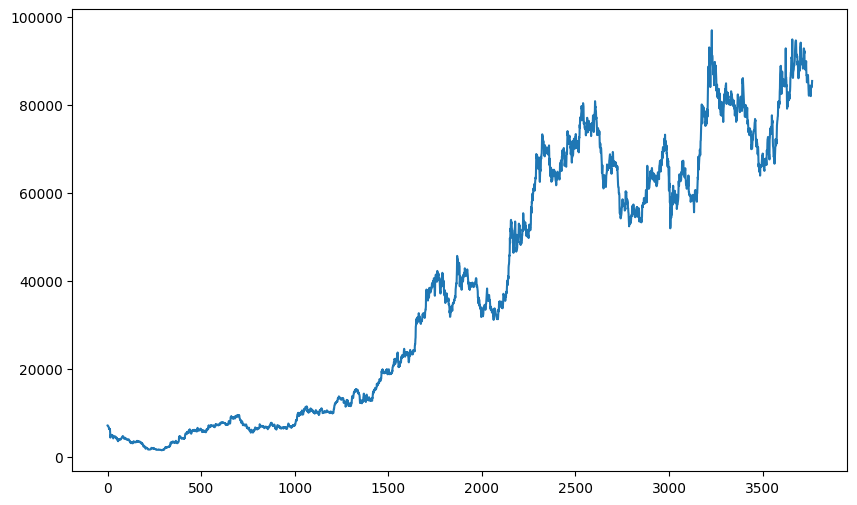

In [124]:
plt.figure(figsize = (10, 6))
plt.plot(df.Close)

In [125]:
df

,Open,High,Low,Close,Volume
0,7220.049805,7340.000000,7126.149902,7156.450195,2644
1,7190.000000,7238.000000,7015.000000,7061.649902,3370
2,7075.000000,7150.000000,7000.000000,7047.649902,3365
3,7060.000000,7265.000000,7000.049805,7039.250000,4584
4,7040.000000,7150.000000,6950.000000,7000.000000,3488
...,...,...,...,...,...
3761,84284.203125,84746.500000,83830.000000,83949.898438,2944
3762,84000.000000,84500.000000,83325.750000,84005.546875,3733
3763,83750.000000,84780.000000,83750.000000,84398.453125,3582
3764,84601.046875,85298.296875,84294.296875,84617.000000,3034


In [67]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3761    88546.981563
3762    88525.473047
3763    88507.659062
3764    88478.086563
3765    88455.789062
Name: Close, Length: 3766, dtype: float64

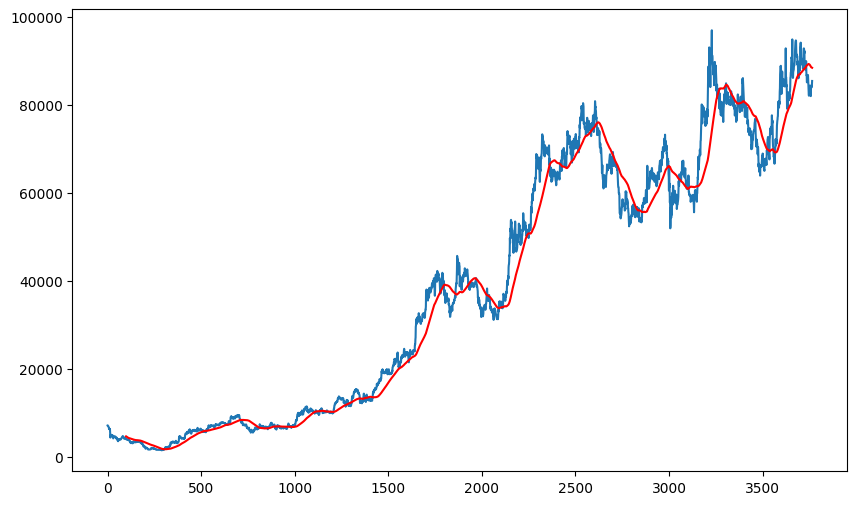

In [68]:
plt.figure(figsize = (10, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [69]:
ma200 = df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3761    85310.207734
3762    85394.352461
3763    85475.721992
3764    85565.549258
3765    85652.372773
Name: Close, Length: 3766, dtype: float64

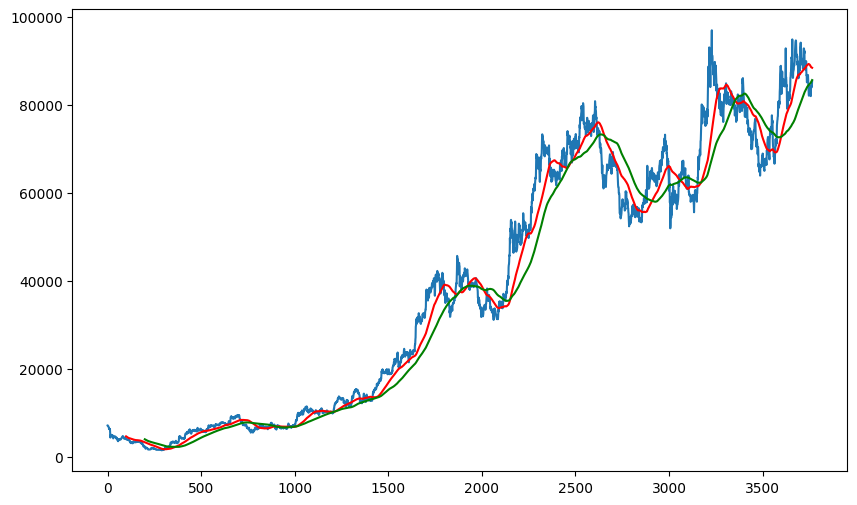

In [70]:
plt.figure(figsize = (10, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [71]:
df.shape ##Gives rows and columns of df

(3766, 5)

In [72]:
#Splitting data into training and testing

#from sklearn.model_selection import train_test_split
#data_training, data_testing = train_test_split(df.Close, test_size=0.3,random_state=20)
#data_training, data_testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

data_training, data_testing

(             Close
 0      7156.450195
 1      7061.649902
 2      7047.649902
 3      7039.250000
 4      7000.000000
 ...            ...
 2631  70352.296875
 2632  70830.546875
 2633  71251.953125
 2634  70506.500000
 2635  69769.546875
 
 [2636 rows x 1 columns],
              Close
 2636  69143.351562
 2637  70244.296875
 2638  69782.296875
 2639  68731.351562
 2640  67783.398438
 ...            ...
 3761  83949.898438
 3762  84005.546875
 3763  84398.453125
 3764  84617.000000
 3765  85456.250000
 
 [1130 rows x 1 columns])

In [73]:
print(data_training.shape), print(data_testing.shape)

(2636, 1)
(1130, 1)


(None, None)

In [74]:
data_training.head()

,Close
0,7156.450195
1,7061.649902
2,7047.649902
3,7039.250000
4,7000.000000


In [75]:
data_testing.head()

,Close
2636,69143.351562
2637,70244.296875
2638,69782.296875
2639,68731.351562
2640,67783.398438


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [77]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.07092773],
       [0.06973273],
       [0.06955625],
       ...,
       [0.87888051],
       [0.86948374],
       [0.86019411]])

In [78]:
data_training_array.shape

(2636, 1)

In [79]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

#the shape of x_train will be (n-100, 100, 1). The first dimension (n-100) represents the number of input sequences, 
#which is equal to the number of sliding windows of size 100 that can be created from the training data. 
#The second dimension 100 represents the length of each input sequence, which contains the previous 100 time steps.
#The third dimension 1 represents the number of features in each time step, which in this case is just the stock price.
#So, the overall shape of x_train will be (number of input sequences, length of input sequences, number of features).

In [80]:
x_train.shape,y_train.shape

((2536, 100, 1), (2536,))

In [81]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index = True)
val_data = scaler.fit_transform(final_df)

x_val = []
y_val = []

for i in range(100, val_data.shape[0]):
    x_val.append(val_data[i-100: i])
    y_val.append(val_data[i, 0])
    
x_val, y_val = np.array(x_val), np.array(y_val)

<ipython-input-81-7adde6176889>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [82]:
x_val.shape ,y_val.shape

((1130, 100, 1), (1130,))

In [84]:
#ML Model
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
#To discover the training epoch on which training was stopped, the “verbose” argument can be set to 2.
early_stop=EarlyStopping(monitor="val_loss",verbose=1,mode='min',patience=8)

#The EarlyStopping callback is used to stop the training of a neural network model when a monitored metric
#(such as validation loss) stops improving for a certain number of epochs (specified by the patience parameter).

#For example, if patience=10, then training will be stopped if the validation loss does not improve for 10 
#consecutive epochs. If the validation loss does improve, then the counter is reset to zero.

# Define the model architecture
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=75, activation='relu', return_sequences=True))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(LSTM(units=25, activation='relu'))
model.add(Dense(units=1))

In [86]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#It is designed to automatically adapt the learning rate during training, allowing it to converge 
#faster and more efficiently than traditional stochastic gradient descent methods.If the learning rate never converges,
#it means that the model is not able to find a set of optimal weights that result in minimum loss.

# Fit the model with the EarlyStopping callback
model.fit(x_train, y_train, epochs=75, validation_data=(x_val, y_val), callbacks=[early_stop])


Epoch 1/75
80/80 [==============================] - 37s 328ms/step - loss: 2.0583 - accuracy: 3.9432e-04 - val_loss: 0.0666 - val_accuracy: 8.8496e-04
Epoch 2/75
80/80 [==============================] - 25s 319ms/step - loss: 0.0104 - accuracy: 7.8864e-04 - val_loss: 0.0118 - val_accuracy: 0.0018
Epoch 3/75
80/80 [==============================] - 25s 318ms/step - loss: 0.0016 - accuracy: 7.8864e-04 - val_loss: 0.0113 - val_accuracy: 0.0018
Epoch 4/75
80/80 [==============================] - 25s 315ms/step - loss: 0.0014 - accuracy: 7.8864e-04 - val_loss: 0.0111 - val_accuracy: 0.0018
Epoch 5/75
80/80 [==============================] - 25s 318ms/step - loss: 0.0013 - accuracy: 7.8864e-04 - val_loss: 0.0107 - val_accuracy: 0.0018
Epoch 6/75
80/80 [==============================] - 25s 317ms/step - loss: 0.0012 - accuracy: 7.8864e-04 - val_loss: 0.0105 - val_accuracy: 0.0018
Epoch 7/75
80/80 [==============================] - 25s 314ms/step - loss: 0.0011 - accuracy: 7.8864e-04 - val_los

In [126]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

KeyError: ignored

In [88]:
model.save('keras_model.h5')

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 100)          40800     
                                                                 
 lstm_9 (LSTM)               (None, 100, 75)           52800     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           25200     
                                                                 
 lstm_11 (LSTM)              (None, 25)                7600      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 126,426
Trainable params: 126,426
Non-trainable params: 0
_________________________________________________________________


In [90]:
data_testing.head(), data_testing.shape

(             Close
 2636  69143.351562
 2637  70244.296875
 2638  69782.296875
 2639  68731.351562
 2640  67783.398438,
 (1130, 1))

In [91]:
past_100_days = data_training.tail(100)

In [92]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-92-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [93]:
final_df.shape

(1230, 1)

In [94]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.5808391 ],
       [0.57753607],
       [0.57724599],
       ...,
       [0.72056907],
       [0.72542527],
       [0.74407378]])

In [95]:
input_data.shape

(1230, 1)

In [96]:
x_test = []
y_test = []

test_data = df['Close']
test_data_array = test_data.to_numpy()
test_data_array = scaler.fit_transform(test_data_array.reshape(-1,1))
print(test_data_array.shape)

for i in range(100, test_data_array.shape[0]):
    x_test.append(test_data_array[i-100: i])
    y_test.append(test_data_array[i])
    
# for i in range(100, input_data.shape[0]):
#     x_test.append(input_data[i-100: i])
#     y_test.append(input_data[i, 0])

(3766, 1)


In [97]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test)
print(y_test.shape)

[[[0.05895333]
  [0.05796007]
  [0.05781339]
  ...
  [0.02686964]
  [0.02653908]
  [0.02631277]]

 [[0.05796007]
  [0.05781339]
  [0.05772538]
  ...
  [0.02653908]
  [0.02631277]
  [0.02745899]]

 [[0.05781339]
  [0.05772538]
  [0.05731415]
  ...
  [0.02631277]
  [0.02745899]
  [0.02658728]]

 ...

 [[0.88690769]
  [0.90151726]
  [0.9026881 ]
  ...
  [0.86826851]
  [0.86354373]
  [0.86412677]]

 [[0.90151726]
  [0.9026881 ]
  [0.90483022]
  ...
  [0.86354373]
  [0.86412677]
  [0.86824338]]

 [[0.9026881 ]
  [0.90483022]
  [0.90694927]
  ...
  [0.86412677]
  [0.86824338]
  [0.87053317]]]
(3666, 1)


In [98]:
y_predicted = model.predict(x_test)

115/115 [==============================] - 10s 79ms/step


In [99]:
y_predicted.shape

(3666, 1)

In [100]:
y_test

array([[0.02745899],
       [0.02658728],
       [0.02599583],
       ...,
       [0.86824338],
       [0.87053317],
       [0.87932627]])

In [101]:
y_predicted

array([[0.0271422 ],
       [0.02692336],
       [0.02674846],
       ...,
       [0.865906  ],
       [0.8677467 ],
       [0.8699224 ]], dtype=float32)

In [102]:
scaler.scale_[0]

1.0477331330601e-05

In [103]:
scale_factor = 1 / scaler.scale_[0]
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

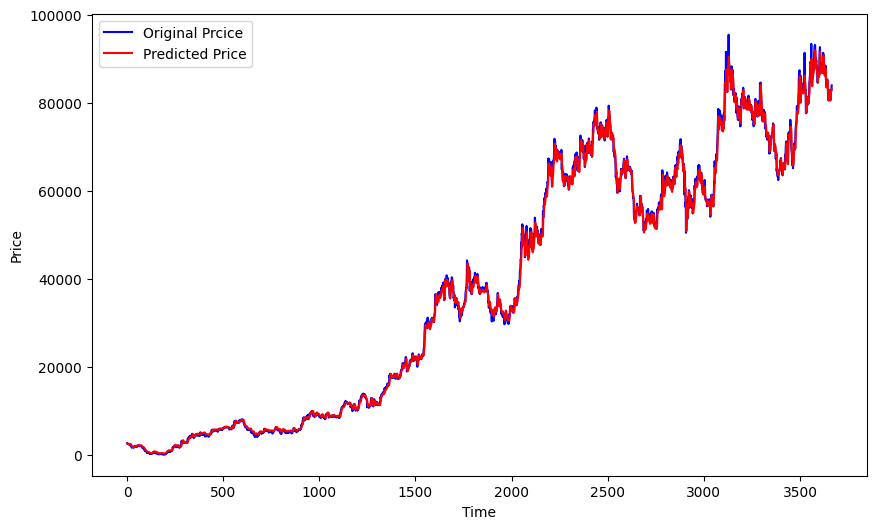

In [104]:
plt.figure(figsize = (10,6))
plt.plot(y_test, 'b', label = 'Original Prcice')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_predicted))
print('MAE: ', mean_absolute_error(y_test, y_predicted))

R2 Score:  0.9987611870668498
MAE:  673.0150598254417


In [105]:
x_test.shape , y_test.shape

((3666, 100, 1), (3666, 1))

In [107]:
fut_inp = x_test[x_test.shape[0] - 100]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)

In [108]:
fut_inp.shape

(1, 100)

In [109]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while (i<30): 
    if(len(tmp_inp) >100):
        fut_inp = np.array(tmp_inp [1:])
        fut_inp = fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat [0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat [0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
        
print (lst_output)

[[0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299], [0.8929417133331299]]


In [110]:
scaler.scale_[0]

1.0477331330601e-05

In [112]:
lst_output= lst_output/1.0477331330601e-05

TypeError: ignored

In [114]:
lst_output

[[0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299],
 [0.8929417133331299]]

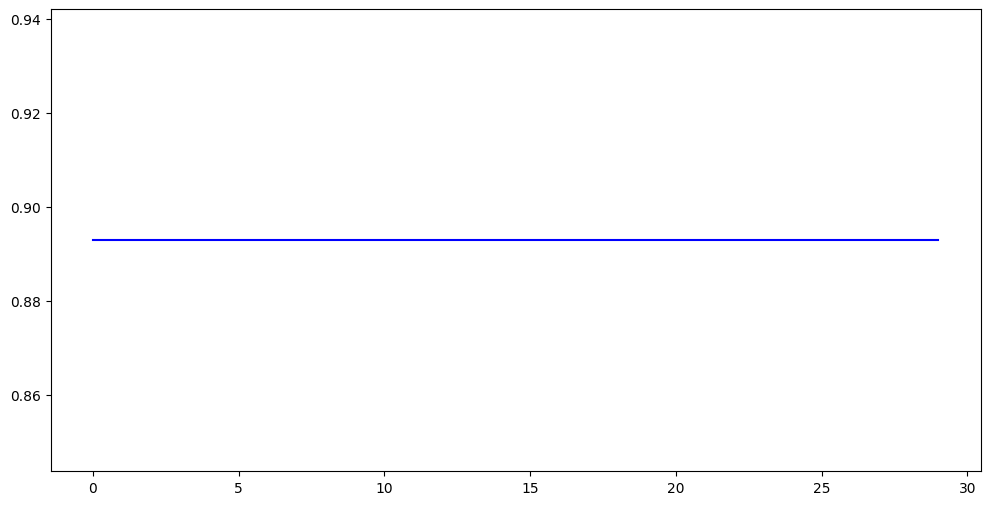

In [116]:
plt.figure(figsize = (12,6))
plt.plot(lst_output, 'b', label = 'Original Prcice')